# Datium Insights Technical Test

### Load libraries

In [170]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
import re
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import r2_score, max_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

import joblib




pd.options.display.max_columns = None

### Columns that cannot be used

In [3]:
cols_that_cannot_be_used = ["AvgWholesale", "AvgRetail", "GoodWholesale", "GoodRetail", "TradeMin", "TradeMax", "PrivateMax"]

### Load datasets

In [4]:
train_dataset_path = r"../datasets/DatiumTrain.rpt"
test_dataset_path = r"../datasets/DatiumTest.rpt"


In [5]:

train_dataset = pd.read_csv(train_dataset_path, delimiter="\t")

/var/folders/8b/2xzjkyq14dz6gp0ygflgcj6w0000gn/T/ipykernel_1192/1506721180.py:1: DtypeWarning: Columns (27,94) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset = pd.read_csv(train_dataset_path, delimiter="\t")


## Drop columns that cannot be used

In [6]:
train_dataset.drop(cols_that_cannot_be_used, axis=1, inplace=True)

## Exploration of training dataset

In [7]:
train_dataset.shape

(50704, 123)

In [8]:
train_dataset.head()

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,LimitedEdition,Series,SeriesModelYear,BadgeDescription,BadgeSecondaryDescription,BodyStyleDescription,BodyConfigDescription,WheelBaseConfig,Roofline,ExtraIdentification,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,GrossCombinationMAss,GrossVehicleMass,VIN,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMFrom,PowerRPMTo,Torque,TorqueRPMFrom,TorqueRPMTo,RonRating,SeatCapacity,ModelCode,BuildCountryOriginDescription,ValvesCylinder,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,EngineNum,Acceleration,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,TowingBrakes,TowingNoBrakes,WarrantyCustAssist,FreeScheduledService,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,AltEngEngineType,AltEngBatteryType,AltEngCurrentType,AltEngAmpHours,AltEngVolts,AltEngChargingMethod,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,AltEngDrive,NormalChargeMins,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,ElectricEngineLocation,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,EmissionStandard,MaxEthanolBlend,AncapRating,VFactsClass,VFactsSegment,VFactsPrice,IsPPlateApproved,AverageKM,GoodKM,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,F,VE,NaN,Omega,NaN,Sedan,NaN,NaN,NaN,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4.0,4,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73.0,Multi-Point Injection,Electronic Sequential,NaN,NaN,6G1EK52B#8L######,2915.0,1476.0,4894.0,1899.0,1690.0,1622.0,NaN,180.0,NaN,6000.0,330.0,NaN,2600.0,91.0,5.0,8EK69-114,AUSTRALIA,4.0,4 Stroke,V60,Front,HBA04 ######,NaN,225/60 R16,225/60 R16,16x7.0,16x7.0,2100.0,NaN,3yr Roadside,NaN,3.0,100000.0,15000.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,260.0,NaN,NaN,NaN,NaN,10.9,NaN,NaN,4.0,Passenger,Large,< $70K,T,230.0,140.0,34790.0,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93.0,227878.0,2000.0
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,F,VR,NaN,Executive,NaN,Wagon,NaN,NaN,NaN,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4.0,5,3791,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68.0,Multi-Point Injection,Electronic,NaN,NaN,6H8VRK35HPL######,2822.0,1478.0,4903.0,1794.0,1380.0,1380.0,NaN,130.0,NaN,4800.0,295.0,NaN,3200.0,NaN,5.0,NaN,AUSTRALIA,2.0,4 Stroke,V90,Front,VH-######,NaN,205/65 R15,205/65 R15,15x6.0,15x6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.6,9.2,NaN,NaN,NaN,Passenger,Large,< $70K,T,600.0,360.0,27978.0,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86.0,153091.0,6800.0
2,Toyota,RAV4,TOYO,RAV4,2012,0,6,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,F,L,F,ACA33R,MY12,CV,NaN,Wagon,NaN,NaN,NaN,NaN,4X4 On Demand,4XO,Manual,Floor,5.0,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,60.0,Multi-Point Injection,Electronic Sequential,3560.0,2060.0,JTMBD33V*05######,2660.0,1695.0,4625.0,1815.0,1545.0,1510.0,515.0,125.0,NaN,6000.0,224.0,NaN,4000.0,91.0,5.0,ACA33R-ANMXKQ,JAPAN,4.0,4 Stroke,In-line,Front,2AZ-#######,NaN,225/65 R17,225/65 R17,17x6.5,17x6.5,1500.0,750.0,NaN,NaN,3.0,100000.0,5000.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.5,3.5,213.0,NaN,NaN,NaN,NaN,9.1,NaN,Na

In [9]:
train_dataset.describe()

,YearGroup,MonthGroup,SequenceNum,GearNum,DoorNum,EngineSize,Cylinders,FuelCapacity,GrossCombinationMAss,GrossVehicleMass,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMFrom,PowerRPMTo,Torque,TorqueRPMFrom,TorqueRPMTo,RonRating,SeatCapacity,ValvesCylinder,Acceleration,TowingBrakes,TowingNoBrakes,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,AltEngAmpHours,AltEngVolts,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,NormalChargeMins,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,AncapRating,AverageKM,GoodKM,NewPrice,Age_Comp_Months,KM,Sold_Amount
count,50704.000000,50704.000000,50704.000000,50703.000000,50704.000000,50704.000000,50704.000000,49892.000000,24524.000000,30463.000000,50561.000000,49985.000000,50045.000000,50047.000000,49170.000000,40153.000000,25615.000000,50592.000000,209.000000,50566.000000,50431.000000,4699.000000,50396.000000,39737.000000,50667.000000,50194.000000,15130.000000,47760.000000,45504.000000,48090.000000,47739.000000,30732.000000,27891.000000,30746.000000,6.000000,836.000000,836.000000,156.000000,237.000000,785.000000,0.0,164.00000,0.0,0.0,0.0,0.0,2.0,2.0,24644.000000,24630.000000,24821.000000,33730.000000,12112.000000,12110.000000,29394.000000,28241.000000,46346.000000,25965.000000,50703.000000,50703.000000,50703.000000,50659.000000,5.070200e+04,50700.000000
mean,2005.177777,1.480396,9.632869,4.615447,4.124467,3000.569580,5.061731,71.905035,4237.271489,2353.787874,2795.959890,1575.180834,4769.513758,1809.761105,1583.991499,1553.754937,778.293031,136.335146,3887.081340,5249.226753,286.095953,1900.404341,3454.733352,91.228301,4.888902,3.518827,9.574197,1803.142274,629.580916,3.101851,92852.096839,6691.819602,5.245420,9.609640,6.266667,542.083254,82.557895,1193.333333,5268.270042,280.834395,NaN,1193.04878,NaN,NaN,NaN,NaN,37.0,120.0,5.701530,5.819610,3.323819,232.896294,283.967801,171.276879,11.587654,7.170908,9.476818,4.260312,306.617163,188.857168,36726.014555,45.775223,8.495406e+04,16401.722226
std,5.302207,2.997782,11.171761,0.956656,0.868757,931.057061,1.123823,22.131647,1090.250085,506.228417,196.377199,180.821663,316.896285,78.646715,282.673958,276.970755,311.324374,41.839118,799.895184,875.834698,88.995227,752.174969,850.284910,0.991823,1.280512,0.848572,1.843429,632.023565,139.894331,0.490317,32103.990718,4848.229330,3.470849,2.818618,0.361478,165.663202,30.820288,41.228448,5513.802631,72.269200,NaN,67.03518,NaN,NaN,NaN,NaN,0.0,0.0,1.128458,1.824878,0.724334,49.219886,63.595995,34.881419,2.642395,1.392198,2.102242,0.654834,139.121984,88.032477,15522.567237,32.153830,7.283732e+04,10312.029249
min,1968.000000,0.000000,0.000000,1.000000,2.000000,659.000000,2.000000,32.000000,1450.000000,970.000000,2.000000,1070.000000,2500.000000,1370.000000,640.000000,720.000000,260.000000,32.000000,3000.000000,2600.000000,67.000000,1000.000000,1200.000000,91.000000,2.000000,2.000000,3.900000,200.000000,100.000000,1.000000,-1.000000,1000.000000,1.000000,3.000000,5.800000,100.000000,10.000000,940.000000,1500.000000,78.000000,NaN,940.00000,NaN,NaN,NaN,NaN,37.0,120.0,1.500000,0.500000,0.500000,89.000000,86.000000,86.000000,3.700000,3.700000,3.900000,1.000000,35.000000,20.000000,5157.000000,0.000000,0.000000e+00,0.000000
25%,2001.000000,0.000000,1.000000,4.000000,4.000000,2359.000000,4.000000,63.000000,3310.000000,1990.000000,2670.000000,1450.000000,4625.000000,1760.000000,1440.000000,1410.000000,515.000000,104.000000,3200.000000,4900.000000,218.000000,1400.000000,2800.000000,91.000000,5.000000,4.000000,8.500000,1300.000000,500.000000,3.000000,100000.000000,3000.000000,3.000000,6.000000,5.975000,500.000000,50.000000,1200.000000,1540.000000,270.000000,NaN,1200.00000,NaN,NaN,NaN,NaN,37.0,120.0,5.000000,5.000000,3.000000,199.000000,250.000000,143.000000

## Clean nulls

In [10]:
nulls = train_dataset.isnull().sum()

<AxesSubplot: >

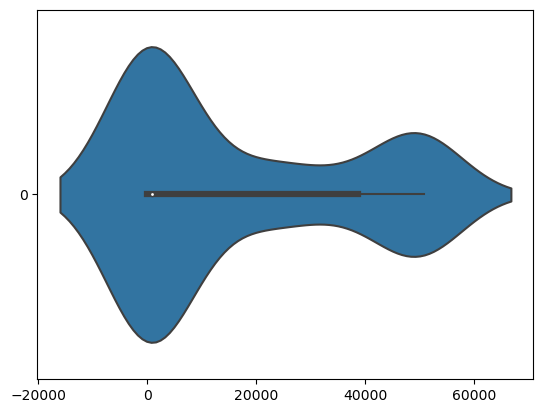

In [11]:
sns.violinplot(nulls,orient="h")

Check columns with large number of missing data

In [12]:
len(nulls[nulls > nulls.median()])

60

In [13]:
nulls.median()

904.0

In [14]:
nulls.quantile(0.75)

38593.0

In [15]:
nulls.max()

50704

In [16]:
nulls[nulls == nulls.max()]

AltEngTorqueFrom       50704
NormalChargeMins       50704
QuickChargeMins        50704
NormalChargeVoltage    50704
QuickChargeVoltage     50704
dtype: int64

Columns that are entirely null seem to be features that belong to electric cars. Does dataset exclude electric cars?

In [17]:
null_percentage = nulls/len(train_dataset)

In [18]:
len(null_percentage[null_percentage > 0.1])

54

In [19]:
len(null_percentage[null_percentage > 0.5])

39

In [20]:
train_dataset[null_percentage[null_percentage > 0.5].index].head()

,SeriesModelYear,BadgeSecondaryDescription,BodyConfigDescription,WheelBaseConfig,Roofline,ExtraIdentification,GrossCombinationMAss,PowerRPMFrom,TorqueRPMFrom,Acceleration,WarrantyCustAssist,FreeScheduledService,AltEngEngineType,AltEngBatteryType,AltEngCurrentType,AltEngAmpHours,AltEngVolts,AltEngChargingMethod,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,AltEngDrive,NormalChargeMins,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,ElectricEngineLocation,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Urban,CO2ExtraUrban,EmissionStandard,MaxEthanolBlend
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3yr Roadside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MY12,NaN,NaN,NaN,NaN,NaN,3560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.5,3.5,NaN,NaN,NaN,NaN
3,MY07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3yr Roadside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,5.0,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roadside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,6.5,3.5,293.0,181.0,NaN,NaN


There are a large quantity of cols with mostly empty rows

In [21]:
train_dataset.iloc[1]

Make                                Holden
Model                            Commodore
MakeCode                              HOLD
FamilyCode                         COMMODO
YearGroup                             1993
                            ...           
Sold_Date          2000-10-18 00:00:00.000
Compliance_Date                    08/1993
Age_Comp_Months                       86.0
KM                                153091.0
Sold_Amount                         6800.0
Name: 1, Length: 123, dtype: object

### Drop any columns with more than 10% of data missing

In [22]:
def clean_nulls_by_percentage(input_df:pd.DataFrame):

    """
        cleaning step to clean null values from the training dataframe.

        Cleaning strategy:
        Remove columns entirely with a null percentage > 10
    """

    #Drop cols with more than 50% null
    df = input_df.copy()
    nulls = df.isnull().sum()/len(df)
    cols_to_drop = nulls[nulls > 0.1]
    df.drop(list(cols_to_drop.index), axis=1, inplace= True)

    return df, cols_to_drop



In [23]:
train_dataset_clean_null, cols_dropped = clean_nulls_by_percentage(train_dataset)

In [24]:
train_dataset_clean_null.shape

(50704, 69)

In [25]:
print(f"Columns dropped with more than 10% nulls: \n{list(cols_dropped.index)}")

Columns dropped with more than 10% nulls: 
['SeriesModelYear', 'BadgeDescription', 'BadgeSecondaryDescription', 'BodyConfigDescription', 'WheelBaseConfig', 'Roofline', 'ExtraIdentification', 'GrossCombinationMAss', 'GrossVehicleMass', 'TareMass', 'PayLoad', 'PowerRPMFrom', 'TorqueRPMFrom', 'RonRating', 'ModelCode', 'Acceleration', 'TowingNoBrakes', 'WarrantyCustAssist', 'FreeScheduledService', 'FirstServiceKM', 'FirstServiceMonths', 'RegServiceMonths', 'AltEngEngineType', 'AltEngBatteryType', 'AltEngCurrentType', 'AltEngAmpHours', 'AltEngVolts', 'AltEngChargingMethod', 'AltEngPower', 'AltEngPowerFrom', 'AltEngPowerTo', 'AltEngTorque', 'AltEngTorqueFrom', 'AltEngTorqueTo', 'AltEngDrive', 'NormalChargeMins', 'QuickChargeMins', 'NormalChargeVoltage', 'QuickChargeVoltage', 'KMRangeElectricEng', 'ElectricEngineLocation', 'TopSpeedElectricEng', 'GreenhouseRating', 'AirpollutionRating', 'OverallGreenStarRating', 'CO2Combined', 'CO2Urban', 'CO2ExtraUrban', 'FuelUrban', 'FuelExtraurban', 'Emiss

### Drop rows with missing categorical value

Drop the rows with missing categorical values, not to attempt imputation later

In [26]:
numerical_cols = train_dataset_clean_null.select_dtypes(include=np.number).columns
non_numerical_cols = list(set(train_dataset_clean_null.columns).difference(set(numerical_cols)))


In [27]:
print(non_numerical_cols)

['OptionCategory', 'RearRimDesc', 'FrontRimDesc', 'Compliance_Date', 'EngineCycleDescription', 'DriveDescription', 'EngineTypeDescription', 'VFactsSegment', 'EngineLocation', 'Make', 'GearTypeDescription', 'FuelTypeDescription', 'FamilyCode', 'EngineNum', 'Branch', 'EngineConfigurationDescription', 'VIN', 'CurrentRelease', 'BuildCountryOriginDescription', 'Sold_Date', 'GearLocationDescription', 'Colour', 'IsPPlateApproved', 'RearTyreSize', 'CamDescription', 'Model', 'FuelDeliveryDescription', 'DriveCode', 'LimitedEdition', 'InductionDescription', 'EngineDescription', 'MakeCode', 'MethodOfDeliveryDescription', 'FrontTyreSize', 'ImportFlag', 'Series', 'VFactsClass', 'BodyStyleDescription', 'Description', 'SaleCategory']


In [28]:
train_dataset_drop_non_numerical_null_rows = train_dataset_clean_null.iloc[train_dataset_clean_null[non_numerical_cols].dropna().index]

In [29]:
train_dataset_drop_non_numerical_null_rows.shape

(46855, 69)

In [30]:
def drop_non_numerical_nulls(input_df:pd.DataFrame):
    """
        Drop rows that has null in non-numerical columns
    """
    df = input_df.copy()

    numerical_cols = train_dataset_clean_null.select_dtypes(include=np.number).columns
    non_numerical_cols = list(set(train_dataset_clean_null.columns).difference(set(numerical_cols)))
    
    df = df.iloc[df[non_numerical_cols].dropna().index]

    return df

## Impute remaining numerical null values with simple median

In [31]:
train_dataset_imputed = train_dataset_drop_non_numerical_null_rows.fillna(train_dataset_drop_non_numerical_null_rows.median(numeric_only=True))

Sanity check

In [32]:
any(train_dataset_imputed.isna().sum().values>0)

False

In [33]:
train_dataset_imputed.shape

(46855, 69)

### Save col names

In [174]:
remaining_cols = train_dataset_imputed.columns
remaining_cols_save_path = r"../assets/columns_used.save"
joblib.dump(remaining_cols, remaining_cols_save_path)

['../assets/columns_used.save']

In [184]:
feature_cols = train_dataset_imputed.drop("Sold_Amount", axis=1).columns
feature_cols_save_path = r"../assets/feature_columns.save"
joblib.dump(feature_cols, feature_cols_save_path)

['../assets/feature_columns.save']

In [182]:
remaining_cols

Index(['Make', 'Model', 'MakeCode', 'FamilyCode', 'YearGroup', 'MonthGroup',
       'SequenceNum', 'Description', 'CurrentRelease', 'ImportFlag',
       'LimitedEdition', 'Series', 'BodyStyleDescription', 'DriveDescription',
       'DriveCode', 'GearTypeDescription', 'GearLocationDescription',
       'GearNum', 'DoorNum', 'EngineSize', 'EngineDescription', 'Cylinders',
       'FuelTypeDescription', 'InductionDescription', 'OptionCategory',
       'CamDescription', 'EngineTypeDescription', 'FuelCapacity',
       'FuelDeliveryDescription', 'MethodOfDeliveryDescription', 'VIN',
       'WheelBase', 'Height', 'Length', 'Width', 'KerbWeight', 'Power',
       'PowerRPMTo', 'Torque', 'TorqueRPMTo', 'SeatCapacity',
       'BuildCountryOriginDescription', 'ValvesCylinder',
       'EngineCycleDescription', 'EngineConfigurationDescription',
       'EngineLocation', 'EngineNum', 'FrontTyreSize', 'RearTyreSize',
       'FrontRimDesc', 'RearRimDesc', 'TowingBrakes', 'WarrantyYears',
       'WarrantyK

### Create simple imputer

In [185]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(train_dataset_imputed.drop("Sold_Amount", axis=1))

SimpleImputer(strategy='most_frequent')

### Save imputer

In [186]:
imputer_path = r"../assets/imputer.save"
joblib.dump(imputer, imputer_path)

['../assets/imputer.save']

# Handle Categorical/String columns

split out numerical and non-numerical columns

In [34]:
numerical_cols_df = train_dataset_imputed.select_dtypes(include=np.number)

In [35]:
non_numerical_cols_df = train_dataset_imputed.select_dtypes(exclude=np.number)

### Check unique values

In [36]:
pd.DataFrame(non_numerical_cols_df.nunique()).transpose()

,Make,Model,MakeCode,FamilyCode,Description,CurrentRelease,ImportFlag,LimitedEdition,Series,BodyStyleDescription,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,EngineDescription,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelDeliveryDescription,MethodOfDeliveryDescription,VIN,BuildCountryOriginDescription,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,EngineNum,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,VFactsClass,VFactsSegment,IsPPlateApproved,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date
0,41,431,41,430,7129,1,1,2,813,15,7,7,8,7,91,6,7,5,10,2,6,3,3316,29,1,9,3,1143,263,275,63,71,4,13,2,871,18,6,4713,306


Narrow scope to cols with more than 10 unique values

In [37]:
cols_with_more_than_10_unique_vals = [col_name for col_name, n_unique in non_numerical_cols_df.nunique().items() if (n_unique > 10)]


In [38]:
pd.DataFrame(non_numerical_cols_df[cols_with_more_than_10_unique_vals].nunique()).transpose()

,Make,Model,MakeCode,FamilyCode,Description,Series,BodyStyleDescription,EngineDescription,VIN,BuildCountryOriginDescription,EngineNum,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,VFactsSegment,Colour,Branch,Sold_Date,Compliance_Date
0,41,431,41,430,7129,813,15,91,3316,29,1143,263,275,63,71,13,871,18,4713,306


In [39]:
non_numerical_cols_df[cols_with_more_than_10_unique_vals].head()

,Make,Model,MakeCode,FamilyCode,Description,Series,BodyStyleDescription,EngineDescription,VIN,BuildCountryOriginDescription,EngineNum,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,VFactsSegment,Colour,Branch,Sold_Date,Compliance_Date
0,Holden,Commodore,HOLD,COMMODO,VE Omega Sedan 4dr. Auto 4sp 3.6i,VE,Sedan,3.6,6G1EK52B#8L######,AUSTRALIA,HBA04 ######,225/60 R16,225/60 R16,16x7.0,16x7.0,Large,White,Perth (WA),2015-11-03 00:00:00.000,02/2008
1,Holden,Commodore,HOLD,COMMODO,VR Executive Wagon 5dr. Auto 4sp 3.8i,VR,Wagon,3.8,6H8VRK35HPL######,AUSTRALIA,VH-######,205/65 R15,205/65 R15,15x6.0,15x6.0,Large,Red,Belmore (NSW),2000-10-18 00:00:00.000,08/1993
2,Toyota,RAV4,TOYO,RAV4,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,ACA33R,Wagon,2.4,JTMBD33V*05######,JAPAN,2AZ-#######,225/65 R17,225/65 R17,17x6.5,17x6.5,Medium,040 - Glacier White (T),Sunshine (VIC),2014-02-05 00:00:00.000,10/2012
3,Holden,Commodore,HOLD,COMMODO,VZ@VE MY07 Executive Wagon 5dr. Auto 4sp 3.6i,VZ@VE,Wagon,3.6,6G1ZK82B#8L######,AUSTRALIA,HBA06 #######,205/65 R15,205/65 R15,15x6.0,15x6.0,Large,Quicksilver,Belmore (NSW),2011-01-10 00:00:00.000,01/2007
4,Toyota,Tarago,TOYO,TARAGO,ACR50R GLi Wagon 8st 5dr Spts Auto 4sp 2.4i,ACR50R,Wagon,2.4,JTEGD52M##7######,JAPAN,2AZ-#######,205/65 R16,215/65 R16,16x6.5,16x6.5,People Movers,Silver,Hobart (TAS),2009-05-23 00:00:00.000,01/2007


### Clean categrical cols

In [40]:
def clean_categorical_columns(input_df:pd.DataFrame):
    """
        Handle the categorical columns by dropping, converting data type

        - drop Model as could be data duplication of other cols
        - drop MakeCode, FamilyCode due to repeated col in Make,Model
        - drop Description due to length of time need to process
        - drop Series as indetifier col
        - drop VIN as identifier
        - drop EngineNum as identifier
        
        - Tyre ratings are in the format of: {width(mm)}/{ratio}R{rim size(inches)}
        - format FrontTyreSize, split into FrontTyreWidth(mm), FrontTyreRatio, FrontTyreRimSize(inches)
        - format RearTyreSize, split into RearTyreWidth(mm), RearTyreRatio, RearTyreRimSize(inches)
        - convert EngineDescription to float 

        - Drop FrontRimDesc, RearRimDesc, will have high correlation to Tyre size
        - Drop Colour, too many variations to format in limited time

        - format Sold_Date, Compliance_Date
    """

    df = input_df.copy()

    numerical_cols_df = df.select_dtypes(include=np.number)
    non_numerical_cols_df = df.select_dtypes(exclude=np.number)

    cols_to_drop = ['Model', 'MakeCode', 'FamilyCode', 'Description', 'Series', 'VIN', 'EngineNum', ]
    df.drop(cols_to_drop, axis=1, inplace=True)

    #tyre size contains two different formats
    #uncertain what format "'7.50 R16 C 6PR'" belongs to, treat as -1
    #only extract for format like 225/60 R16
    def is_standard_tyre_format(tyre_info):
        
        re_pattern = r"^\d{3}/\d{2}\s{1}R{1}\d{2}"
        pattern = re.compile(re_pattern)
        is_match = pattern.match(tyre_info)

        return is_match
        
    df['RearTyreRadius(inches)'] = df['RearTyreSize'].map(lambda tire_size: int(re.compile(r"R\d{2}").search(tire_size).group().strip().strip('R')[-1]) if is_standard_tyre_format(tire_size) else -1)
    df['RearTyreWidth(mm)'] = df['RearTyreSize'].map(lambda tire_size : int(tire_size.strip().split('/')[0]) if is_standard_tyre_format(tire_size) else -1)
    df['RearTyreRatio'] = df['RearTyreSize'].map(lambda tire_size : int(tire_size.strip().split('/')[1].split('R')[0].strip()) if is_standard_tyre_format(tire_size) else -1)
    df.drop('RearTyreSize', axis=1)

    df['FrontTyreRadius(inches)'] = df['FrontTyreSize'].map(lambda tire_size: int(re.compile(r"R\d{2}").search(tire_size).group().strip().strip('R')[-1]) if is_standard_tyre_format(tire_size) else -1)
    df['FrontTyreWidth(mm)'] = df['FrontTyreSize'].map(lambda tire_size : int(tire_size.strip().split('/')[0]) if is_standard_tyre_format(tire_size) else -1)
    df['FrontTyreRatio'] = df['FrontTyreSize'].map(lambda tire_size : int(tire_size.strip().split('/')[1].split('R')[0].strip()) if is_standard_tyre_format(tire_size) else -1)
    df.drop('FrontTyreSize', axis=1)

    df['EngineDescription'] = df['EngineDescription'].astype(float)

    df.drop(['FrontRimDesc', 'RearRimDesc'], axis=1, inplace= True)

    df.drop('Colour', axis=1, inplace=True)

    #"2015-11-03 00:00:00.000"
    datetime_format = "%Y-%m-%d"
    df['Sold_Date'] = pd.to_datetime(df['Sold_Date'].map(lambda dt : dt[:10]), format=datetime_format)
    df['Sold_Year'] = df['Sold_Date'].dt.year
    df['Sold_Month'] = df['Sold_Date'].dt.month
    df.drop('Sold_Date', inplace=True, axis=1)
    
    #02/2008
    datetime_format = "%m/%Y"
    df['Compliance_Date'] = pd.to_datetime(df['Compliance_Date'], format=datetime_format)
    df['Compliance_Year'] = df['Compliance_Date'].dt.year
    df.drop('Compliance_Date', inplace=True, axis=1)

    return df

    

In [41]:
train_dataset_clean_cat = clean_categorical_columns(train_dataset_imputed)

In [42]:
train_dataset_clean_cat.head()

,Make,YearGroup,MonthGroup,SequenceNum,CurrentRelease,ImportFlag,LimitedEdition,BodyStyleDescription,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,WheelBase,Height,Length,Width,KerbWeight,Power,PowerRPMTo,Torque,TorqueRPMTo,SeatCapacity,BuildCountryOriginDescription,ValvesCylinder,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,FrontTyreSize,RearTyreSize,TowingBrakes,WarrantyYears,WarrantyKM,FuelCombined,VFactsClass,VFactsSegment,IsPPlateApproved,AverageKM,GoodKM,NewPrice,Branch,SaleCategory,Age_Comp_Months,KM,Sold_Amount,RearTyreRadius(inches),RearTyreWidth(mm),RearTyreRatio,FrontTyreRadius(inches),FrontTyreWidth(mm),FrontTyreRatio,Sold_Year,Sold_Month,Compliance_Year
0,Holden,2008,0,0,F,L,F,Sedan,Rear Wheel Drive,RWD,Automatic,Floor,4.0,4,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73.0,Multi-Point Injection,Electronic Sequential,2915.0,1476.0,4894.0,1899.0,1690.0,180.0,6000.0,330.0,2600.0,5.0,AUSTRALIA,4.0,4 Stroke,V60,Front,225/60 R16,225/60 R16,2100.0,3.0,100000.0,10.9,Passenger,Large,T,230.0,140.0,34790.0,Perth (WA),Auction,93.0,227878.0,2000.0,6,225,60,6,225,60,2015,11,2008
1,Holden,1993,7,41,F,L,F,Wagon,Rear Wheel Drive,RWD,Automatic,Floor,4.0,5,3791,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68.0,Multi-Point Injection,Electronic,2822.0,1478.0,4903.0,1794.0,1380.0,130.0,4800.0,295.0,3200.0,5.0,AUSTRALIA,2.0,4 Stroke,V90,Front,205/65 R15,205/65 R15,1800.0,3.0,100000.0,9.2,Passenger,Large,T,600.0,360.0,27978.0,Belmore (NSW),Auction,86.0,153091.0,6800.0,5,205,65,5,205,65,2000,10,1993
2,Toyota,2012,0,6,F,L,F,Wagon,4X4 On Demand,4XO,Manual,Floor,5.0,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,60.0,Multi-Point Injection,Electronic Sequential,2660.0,1695.0,4625.0,1815.0,1545.0,125.0,6000.0,224.0,4000.0,5.0,JAPAN,4.0,4 Stroke,In-line,Front,225/65 R17,225/65 R17,1500.0,3.0,100000.0,9.1,SUV,Medium,T,130.0,80.0,31990.0,Sunshine (VIC),Dealer Only Auction,16.0,27374.0,22900.0,7,225,65,7,225,65,2014,2,2012
3,Holden,2007,0,11,F,L,F,Wagon,Rear Wheel Drive,RWD,Automatic,Floor,4.0,5,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,75.0,Multi-Point Injection,Electronic Sequential,2938.0,1527.0,5033.0,1847.0,1576.0,172.0,6000.0,320.0,2800.0,5.0,AUSTRALIA,4.0,4 Stroke,V60,Front,205/65 R15,205/65 R15,2100.0,3.0,100000.0,11.2,Passenger,Large,T,250.0,150.0,35990.0,Belmore (NSW),Auction,48.0,99452.0,10500.0,5,205,65,5,205,65,2011,1,2007
4,Toyota,2007,0,0,F,L,F,Wagon,Front Wheel Drive,FWD,Sports Automatic,Dash,4.0,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,65.0,Multi-Point Injection,Electronic Sequential,2950.0,1750.0,4795.0,1800.0,1725.0,125.0,6000.0,224.0,4000.0,8.0,JAPAN,4.0,4 Stroke,In-line,Front,205/65 R16,215/65 R16,1600.0,3.0,100000.0,9.5,Passenger,People Movers,T,250.0,150.0,49490.0,Hobart (TAS),Special Fixed Price,28.0,44355.0,31320.0,6,215,65,6,205,65,2009,5,2007


### Normalize data

In [139]:
def normalize_data(input_df:pd.DataFrame):
    """
        Normalise the input data
    """

    df = input_df.copy()

    SC = MinMaxScaler()
    numerical_df = df.select_dtypes(include=np.number)
    non_numerical_df = df.select_dtypes(exclude=np.number)
    normalized_data = SC.fit_transform(numerical_df)
    normalized_df = pd.DataFrame(normalized_data)
    normalized_df.columns = numerical_df.columns

    normalized_df.reset_index(drop=True, inplace=True)
    non_numerical_df.reset_index(drop=True, inplace=True)

    joined_df = pd.concat([normalized_df,non_numerical_df], axis=1)

    normalize_data.scaler = SC

    return joined_df

In [187]:
train_dataset_normalized_df = normalize_data(train_dataset_clean_cat.drop('Sold_Amount', axis=1))

In [188]:
#serialize normalizer
normalizer_path = r"../assets/normalizer.save"
joblib.dump(normalize_data.scaler, normalizer_path)

['../assets/normalizer.save']

### One hot encoding

In [177]:
def one_hot_encode(input_df:pd.DataFrame):
    """
        One hot encode on the categorical cols
    """

    df = input_df.copy()

    numerical_cols_df = df.select_dtypes(include=np.number)
    non_numerical_cols_df = df.select_dtypes(exclude=np.number)
    non_numerical_cols_df.astype(str)

    en = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    en.fit(non_numerical_cols_df)
    one_hot_encoded = en.transform(non_numerical_cols_df)

    one_hot_encode.transformer = en
    one_hot_df = pd.DataFrame(one_hot_encoded)
    one_hot_encode.one_hot_df = one_hot_df
    one_hot_df.columns = en.get_feature_names_out()
    numerical_cols_df.reset_index(drop=True, inplace=True)
    one_hot_df.reset_index(drop=True, inplace=True)
    joined_df = pd.concat([numerical_cols_df, one_hot_df], 1)

    return joined_df

In [178]:
train_dataset_one_hot = one_hot_encode(train_dataset_normalized_df)

/var/folders/8b/2xzjkyq14dz6gp0ygflgcj6w0000gn/T/ipykernel_1192/1226931840.py:22: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  joined_df = pd.concat([numerical_cols_df, one_hot_df], 1)


In [179]:
#serialize encoder
encoder_path = r"../assets/encoder.save"
joblib.dump(one_hot_encode.transformer, encoder_path)

['../assets/encoder.save']

### Save cleaned dataset

In [180]:
train_dataset_one_hot.head()

,YearGroup,MonthGroup,SequenceNum,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelCapacity,WheelBase,Height,Length,Width,KerbWeight,Power,PowerRPMTo,Torque,TorqueRPMTo,SeatCapacity,ValvesCylinder,TowingBrakes,WarrantyYears,WarrantyKM,FuelCombined,AverageKM,GoodKM,NewPrice,Age_Comp_Months,KM,Sold_Amount,RearTyreRadius(inches),RearTyreWidth(mm),RearTyreRatio,FrontTyreRadius(inches),FrontTyreWidth(mm),FrontTyreRatio,Sold_Year,Sold_Month,Compliance_Year,Make_Alfa Romeo,Make_Audi,Make_Bentley,Make_Chery,Make_Chrysler,Make_Citroen,Make_Daewoo,Make_Daihatsu,Make_Dodge,Make_Ferrari,Make_Fiat,Make_Ford,Make_Great Wall,Make_Holden,Make_Honda,Make_Hyundai,Make_Jaguar,Make_Jeep,Make_Land Rover,Make_Lexus,Make_Lotus,Make_MINI,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Opel,Make_Peugeot,Make_Porsche,Make_Proton,Make_Renault,Make_SKODA,Make_Saab,Make_SsangYong,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart,CurrentRelease_F,ImportFlag_L,LimitedEdition_F,LimitedEdition_T,BodyStyleDescription_Bus,BodyStyleDescription_Cab Chassis,BodyStyleDescription_Cabriolet,BodyStyleDescription_Convertible,BodyStyleDescription_Coupe,BodyStyleDescription_Hardtop,BodyStyleDescription_Hatchback,BodyStyleDescription_Liftback,BodyStyleDescription_Roadster,BodyStyleDescription_Sedan,BodyStyleDescription_Softtop,BodyStyleDescription_Traytop,BodyStyleDescription_Utility,BodyStyleDescription_Van,BodyStyleDescription_Wagon,DriveDescription_4X4,DriveDescription_4X4 Constant,DriveDescription_4X4 Dual Range,DriveDescription_4X4 On Demand,DriveDescription_Four Wheel Drive,DriveDescription_Front Wheel Drive,DriveDescription_Rear Wheel Drive,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,GearTypeDescription_Automatic,GearTypeDescription_Constantly Variable Transmission,GearTypeDescription_Manual,GearTypeDescription_Manual Auto-clutch - H Pattern,GearTypeDescription_Seq. Manual Auto-Single Clutch,GearTypeDescription_Sports Automatic,GearTypeDescription_Sports Automatic Dual Clutch,GearTypeDescription_Sports Automatic Single Clutch,GearLocationDescription_Column,GearLocationDescription_Dash,GearLocationDescription_Floor,GearLocationDescription_S/Wheel & Column,GearLocationDescription_S/Wheel & Dash,GearLocationDescription_S/Wheel & Floor,GearLocationDescription_Steering Wheel,FuelTypeDescription_Diesel,FuelTypeDescription_LPG only,FuelTypeDescription_Petrol,FuelTypeDescription_Petrol - Premium ULP,FuelTypeDescription_Petrol - Unleaded ULP,FuelTypeDescription_Petrol or LPG (Dual),InductionDescription_Aspirated,InductionDescription_Supercharged,InductionDescription_Supercharged Intercooled,InductionDescription_Turbo,InductionDescription_Turbo Intercooled,InductionDescription_Turbo Supercharged Intercooled,InductionDescription_Twin Turbo Intercooled,OptionCategory_BUS,OptionCategory_CC,OptionCategory_PASS,OptionCategory_SUV,OptionCategory_VAN,CamDescription_DOHC with VVT,CamDescription_DOHC with VVT & Lift,CamDescription_DOHC with Variable Valve Lift,CamDescription_Double Overhead Cam,CamDescription_OHC with VVT,CamDescription_OHC with VVT & Lift,CamDescription_OHC with Variable Valve Lift,CamDescription_Overhead Cam,CamDescription_Pushrod,CamDescription_Pushrod with VVT,EngineTypeDescription_Piston,EngineTypeDescription_Piston - Electric,FuelDeliveryDescription_Carburettor Multiple,FuelDeliveryDescription_Carburettor Single,FuelDeliveryDescription_Direct & Multi-Point Injection,FuelDeliveryDescription_Direct Injection,FuelDeliveryDescription_Multi-Point Injection,FuelDeliveryDescription_Single-Point Injection,MethodOfDeliveryDescription_Electronic,MethodOfDeliveryDescription_Electronic Sequential,MethodOfDeliveryDescription_Mechanical,BuildCountryOriginDescription_ARGENTINA,BuildCountryOriginDescription_AUSTRALIA,BuildCountryOriginDescription_AUSTRIA,BuildCountryOriginDescription_BELGIUM,BuildCountryOriginDescription_CANADA,BuildCountryOriginDescription_CHIN

In [181]:
cleaned_dataset_save_path = r"../datasets/cleaned_train.csv"

train_dataset_one_hot.to_csv(cleaned_dataset_save_path, index=False)